In [1]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional , GRU , RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import pandas
from keras.models import load_model
from os.path import isfile
import os
from keras.optimizers import Adam
import pickle

In [5]:
n_epoch= 100

In [29]:
def getFeaturesAndTargetRemoveDate(_df):
    try:
        train_y = _df['target']
        train = _df.drop(['date','target'],axis =1)
    except:
        train_y = _df['Target']
        train = _df.drop(['date','Target'],axis =1)        
    return train, train_y

In [7]:
def getStartEndDateShape(dfz):
    startDate = str(min(dfz['date']))
    endDate = str(max(dfz['date']))
    print('startDate', startDate)
    print('endDate', endDate)
    print('shape', dfz.shape)
    print('---------------------------')

# DL for Engineered Features - Scaled

In [8]:
trainingData = pd.read_csv('train_tw_nw_fi.csv')
testingData =  pd.read_csv('test_tw_nw_fi.csv')

getStartEndDateShape(trainingData)
getStartEndDateShape(testingData)

startDate 2015-05-04
endDate 2018-12-31
shape (1336, 79)
---------------------------
startDate 2019-01-01
endDate 2019-03-28
shape (87, 79)
---------------------------


In [9]:
train, train_y = getFeaturesAndTargetRemoveDate(trainingData)
test, test_y = getFeaturesAndTargetRemoveDate(testingData)

In [10]:
print('train',train.shape,'test',test.shape,'len(train_y)',len(train_y),'len(test_y)',len(test_y))

train (1336, 77) test (87, 77) len(train_y) 1336 len(test_y) 87


In [11]:
def DenseNetwork():
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Dense(100,activation='relu',input_dim=77,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Hidden Layer-2
    model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [12]:
def CNN_LSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(LSTM(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [13]:
def RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
    
    #Hidden Layer-2
    model.add(RepeatVector(1))
    
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, return_sequences=True))

    #Output layer
    model.add(keras.layers.TimeDistributed(Dense(1,activation='sigmoid')))
#     model.summary()
    return model

In [14]:
def CNN_RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [15]:
def CNN_GRUNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(GRU(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [16]:
def CNN_BideirectionalLSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(Bidirectional(LSTM(100)))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [17]:
def evaluateModelAndTestAccuracy(model,trainX, trainY, testX, testY,n_epoch):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, epochs=n_epoch, validation_split=0.1,batch_size=256, verbose=1,)
    
    results = model.evaluate(testX, testY)
    
    y_pred = model.predict_classes(testX)
    print("Evaluation on test data: Loss - {0},  Acurracy - {1}".format(results[0],str(results[1]*100)))
    print('classification_score\n',classification_report(y_pred, testY))
    
    return history

In [18]:
def vizModelMetric(history,n_epoch):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, n_epoch), history.history["acc"], label="train_acc")
    plt.plot(np.arange(0, n_epoch), history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [19]:
def NaivePredition(y_test):
    
    y_testCheck = y_test.copy()
    y_pred = list()
    
    for counter in range(len(y_testCheck)-1):
        y_pred.append(y_testCheck[counter])
    
    y_testCheck = y_testCheck[1:]
    print ('Model accuracy = %.3f' % accuracy_score(y_pred,y_testCheck))

    print('classification_score\n',classification_report(y_pred, y_testCheck))

In [20]:
NaivePredition(list(test_y))

Model accuracy = 0.756
classification_score
               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        36
         1.0       0.78      0.80      0.79        50

   micro avg       0.76      0.76      0.76        86
   macro avg       0.75      0.75      0.75        86
weighted avg       0.75      0.76      0.76        86



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               7800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________

1202/1202 [==============================] - 0s 19us/step - loss: 0.5676 - acc: 0.8311 - val_loss: 0.7175 - val_acc: 0.7761
Epoch 47/100
1202/1202 [==============================] - 0s 19us/step - loss: 0.5723 - acc: 0.8228 - val_loss: 0.7196 - val_acc: 0.7612
Epoch 48/100
1202/1202 [==============================] - 0s 17us/step - loss: 0.5721 - acc: 0.8236 - val_loss: 0.6908 - val_acc: 0.7836
Epoch 49/100
1202/1202 [==============================] - 0s 17us/step - loss: 0.5570 - acc: 0.8328 - val_loss: 0.6896 - val_acc: 0.7836
Epoch 50/100
1202/1202 [==============================] - 0s 17us/step - loss: 0.5472 - acc: 0.8270 - val_loss: 0.6935 - val_acc: 0.7761
Epoch 51/100
1202/1202 [==============================] - 0s 17us/step - loss: 0.5360 - acc: 0.8403 - val_loss: 0.7093 - val_acc: 0.7687
Epoch 52/100
1202/1202 [==============================] - 0s 17us/step - loss: 0.5329 - acc: 0.8411 - val_loss: 0.6923 - val_acc: 0.7910
Epoch 53/100
1202/1202 [==============================

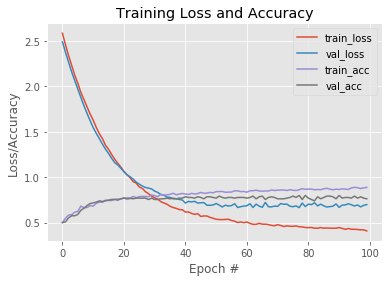

In [21]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(),train, train_y, test, test_y ,n_epoch),n_epoch)

In [22]:
# Research paper and models -> https://github.com/EmielStoelinga/CCMLWI

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 3s 2ms/step - loss: 0.6919 - acc: 0.5241 - val_loss: 0.6976 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 0s 297us/step - loss: 0.6891 - 

Epoch 54/100
1202/1202 [==============================] - 0s 286us/step - loss: 0.6569 - acc: 0.5874 - val_loss: 0.6698 - val_acc: 0.5299
Epoch 55/100
1202/1202 [==============================] - 0s 287us/step - loss: 0.6507 - acc: 0.5882 - val_loss: 0.6996 - val_acc: 0.5821
Epoch 56/100
1202/1202 [==============================] - 0s 287us/step - loss: 0.6446 - acc: 0.6048 - val_loss: 0.7555 - val_acc: 0.6493
Epoch 57/100
1202/1202 [==============================] - 0s 286us/step - loss: 0.6441 - acc: 0.6115 - val_loss: 0.6469 - val_acc: 0.6642
Epoch 58/100
1202/1202 [==============================] - 0s 289us/step - loss: 0.6382 - acc: 0.6281 - val_loss: 0.6239 - val_acc: 0.6045
Epoch 59/100
1202/1202 [==============================] - 0s 287us/step - loss: 0.6273 - acc: 0.6356 - val_loss: 0.6385 - val_acc: 0.6493
Epoch 60/100
1202/1202 [==============================] - 0s 286us/step - loss: 0.6168 - acc: 0.6356 - val_loss: 0.6974 - val_acc: 0.6119
Epoch 61/100
1202/1202 [==========

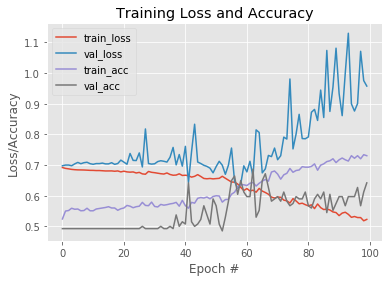

In [23]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 2s 2ms/step - loss: 0.6919 - acc: 0.5383 - val_loss: 0.7107 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 1s 456us/step - loss: 0.6875 

Epoch 54/100
1202/1202 [==============================] - 1s 431us/step - loss: 0.4558 - acc: 0.7704 - val_loss: 1.3344 - val_acc: 0.5299
Epoch 55/100
1202/1202 [==============================] - 1s 444us/step - loss: 0.4471 - acc: 0.7804 - val_loss: 1.3891 - val_acc: 0.5075
Epoch 56/100
1202/1202 [==============================] - 1s 443us/step - loss: 0.4391 - acc: 0.7812 - val_loss: 1.3504 - val_acc: 0.5299
Epoch 57/100
1202/1202 [==============================] - 1s 446us/step - loss: 0.4254 - acc: 0.7837 - val_loss: 1.2853 - val_acc: 0.5448
Epoch 58/100
1202/1202 [==============================] - 1s 468us/step - loss: 0.4271 - acc: 0.7987 - val_loss: 1.3977 - val_acc: 0.5597
Epoch 59/100
1202/1202 [==============================] - 1s 442us/step - loss: 0.4330 - acc: 0.7829 - val_loss: 1.5165 - val_acc: 0.4925
Epoch 60/100
1202/1202 [==============================] - 1s 430us/step - loss: 0.4200 - acc: 0.7887 - val_loss: 1.4416 - val_acc: 0.5299
Epoch 61/100
1202/1202 [==========

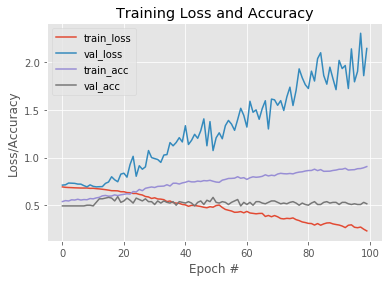

In [24]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 1s 1ms/step - loss: 0.6923 - acc: 0.5408 - val_loss: 0.6990 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 0s 245us/step - loss: 0.6899 - 

Epoch 54/100
1202/1202 [==============================] - 0s 229us/step - loss: 0.6651 - acc: 0.5774 - val_loss: 0.7017 - val_acc: 0.5075
Epoch 55/100
1202/1202 [==============================] - 0s 240us/step - loss: 0.6624 - acc: 0.5923 - val_loss: 0.7029 - val_acc: 0.5149
Epoch 56/100
1202/1202 [==============================] - 0s 232us/step - loss: 0.6599 - acc: 0.5840 - val_loss: 0.7005 - val_acc: 0.5075
Epoch 57/100
1202/1202 [==============================] - 0s 240us/step - loss: 0.6596 - acc: 0.5882 - val_loss: 0.7082 - val_acc: 0.5075
Epoch 58/100
1202/1202 [==============================] - 0s 260us/step - loss: 0.6614 - acc: 0.5907 - val_loss: 0.7116 - val_acc: 0.5075
Epoch 59/100
1202/1202 [==============================] - 0s 245us/step - loss: 0.6618 - acc: 0.5799 - val_loss: 0.6894 - val_acc: 0.5299
Epoch 60/100
1202/1202 [==============================] - 0s 247us/step - loss: 0.6571 - acc: 0.6040 - val_loss: 0.6809 - val_acc: 0.5970
Epoch 61/100
1202/1202 [==========

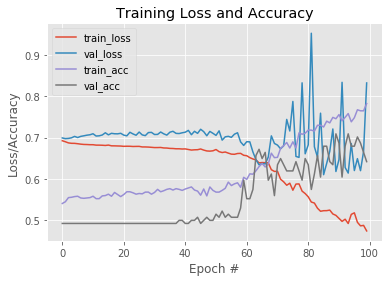

In [25]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 1s 874us/step - loss: 0.6993 - acc: 0.5175 - val_loss: 0.7215 - val_acc: 0.5000
Epoch 2/100
1202/1202 [==============================] - 0s 144us/step - loss: 0.6728 

Epoch 54/100
1202/1202 [==============================] - 0s 124us/step - loss: 0.1749 - acc: 0.9426 - val_loss: 0.4293 - val_acc: 0.8134
Epoch 55/100
1202/1202 [==============================] - 0s 124us/step - loss: 0.1545 - acc: 0.9484 - val_loss: 0.5293 - val_acc: 0.7090
Epoch 56/100
1202/1202 [==============================] - 0s 146us/step - loss: 0.1522 - acc: 0.9493 - val_loss: 0.5606 - val_acc: 0.7463
Epoch 57/100
1202/1202 [==============================] - 0s 143us/step - loss: 0.1455 - acc: 0.9576 - val_loss: 0.4628 - val_acc: 0.7836
Epoch 58/100
1202/1202 [==============================] - 0s 156us/step - loss: 0.1638 - acc: 0.9409 - val_loss: 0.4871 - val_acc: 0.7687
Epoch 59/100
1202/1202 [==============================] - 0s 139us/step - loss: 0.1610 - acc: 0.9418 - val_loss: 0.4781 - val_acc: 0.7910
Epoch 60/100
1202/1202 [==============================] - 0s 117us/step - loss: 0.1626 - acc: 0.9393 - val_loss: 0.5254 - val_acc: 0.7612
Epoch 61/100
1202/1202 [==========

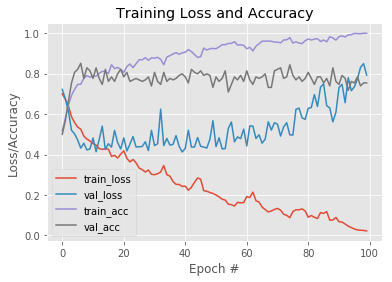

In [26]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

# DL for Engineered Features - Unscaled

In [27]:
trainingData = pd.read_csv('train_ns_tw_nw_fi.csv')
testingData =  pd.read_csv('test_ns_tw_nw_fi.csv')

getStartEndDateShape(trainingData)
getStartEndDateShape(testingData)

startDate 2015-05-04
endDate 2018-12-31
shape (1336, 79)
---------------------------
startDate 2019-01-01
endDate 2019-03-28
shape (87, 79)
---------------------------


In [30]:

train, train_y = getFeaturesAndTargetRemoveDate(trainingData)
test, test_y = getFeaturesAndTargetRemoveDate(testingData)

print('train',train.shape,'test',test.shape,'len(train_y)',len(train_y),'len(test_y)',len(test_y))

train (1336, 77) test (87, 77) len(train_y) 1336 len(test_y) 87


In [31]:
NaivePredition(list(test_y))

Model accuracy = 0.756
classification_score
               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        36
         1.0       0.78      0.80      0.79        50

   micro avg       0.76      0.76      0.76        86
   macro avg       0.75      0.75      0.75        86
weighted avg       0.75      0.76      0.76        86



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               7800      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 1s 950us/step - loss: 9.6388 - acc

1202/1202 [==============================] - 0s 20us/step - loss: 7.2496 - acc: 0.5483 - val_loss: 8.1371 - val_acc: 0.4925
Epoch 54/100
1202/1202 [==============================] - 0s 21us/step - loss: 7.2355 - acc: 0.5491 - val_loss: 8.1364 - val_acc: 0.4925
Epoch 55/100
1202/1202 [==============================] - 0s 21us/step - loss: 7.2350 - acc: 0.5491 - val_loss: 8.1358 - val_acc: 0.4925
Epoch 56/100
1202/1202 [==============================] - 0s 19us/step - loss: 7.2343 - acc: 0.5491 - val_loss: 8.1353 - val_acc: 0.4925
Epoch 57/100
1202/1202 [==============================] - 0s 20us/step - loss: 7.1807 - acc: 0.5524 - val_loss: 8.1348 - val_acc: 0.4925
Epoch 58/100
1202/1202 [==============================] - 0s 20us/step - loss: 7.1938 - acc: 0.5516 - val_loss: 8.1344 - val_acc: 0.4925
Epoch 59/100
1202/1202 [==============================] - 0s 18us/step - loss: 7.2195 - acc: 0.5499 - val_loss: 8.1340 - val_acc: 0.4925
Epoch 60/100
1202/1202 [==============================

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


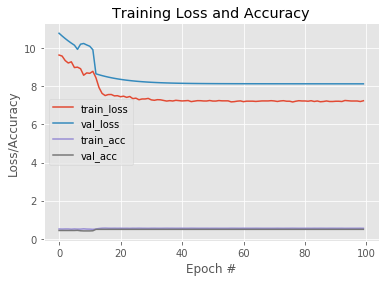

In [32]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 2s 1ms/step - loss: 0.6897 - acc: 0.5366 - val_loss: 0.7056 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 0s 288us/step - loss: 0.6870 - 

Epoch 54/100
1202/1202 [==============================] - 0s 308us/step - loss: 0.5967 - acc: 0.6797 - val_loss: 0.8197 - val_acc: 0.4701
Epoch 55/100
1202/1202 [==============================] - 0s 314us/step - loss: 0.5891 - acc: 0.6714 - val_loss: 0.8588 - val_acc: 0.4179
Epoch 56/100
1202/1202 [==============================] - 0s 312us/step - loss: 0.5941 - acc: 0.6705 - val_loss: 0.8172 - val_acc: 0.4851
Epoch 57/100
1202/1202 [==============================] - 0s 303us/step - loss: 0.5965 - acc: 0.6656 - val_loss: 0.8369 - val_acc: 0.4328
Epoch 58/100
1202/1202 [==============================] - 0s 344us/step - loss: 0.5884 - acc: 0.6830 - val_loss: 0.8650 - val_acc: 0.4179
Epoch 59/100
1202/1202 [==============================] - 0s 315us/step - loss: 0.5859 - acc: 0.6847 - val_loss: 0.8390 - val_acc: 0.4627
Epoch 60/100
1202/1202 [==============================] - 0s 290us/step - loss: 0.5810 - acc: 0.6880 - val_loss: 0.8180 - val_acc: 0.4701
Epoch 61/100
1202/1202 [==========

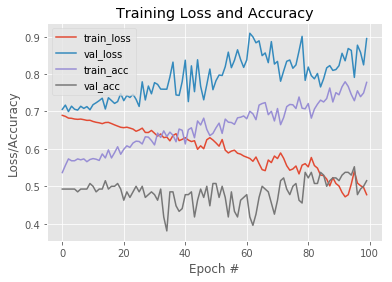

In [33]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 3s 3ms/step - loss: 0.7059 - acc: 0.5275 - val_loss: 0.7217 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 1s 501us/step - loss: 0.6902 

Epoch 54/100
1202/1202 [==============================] - 1s 462us/step - loss: 0.6370 - acc: 0.6414 - val_loss: 0.7304 - val_acc: 0.5075
Epoch 55/100
1202/1202 [==============================] - 1s 490us/step - loss: 0.6368 - acc: 0.6281 - val_loss: 0.7408 - val_acc: 0.5075
Epoch 56/100
1202/1202 [==============================] - 1s 488us/step - loss: 0.6339 - acc: 0.6331 - val_loss: 0.7293 - val_acc: 0.5075
Epoch 57/100
1202/1202 [==============================] - 1s 537us/step - loss: 0.6309 - acc: 0.6348 - val_loss: 0.7301 - val_acc: 0.5075
Epoch 58/100
1202/1202 [==============================] - 1s 505us/step - loss: 0.6372 - acc: 0.6240 - val_loss: 0.7767 - val_acc: 0.4776
Epoch 59/100
1202/1202 [==============================] - 1s 476us/step - loss: 0.6350 - acc: 0.6331 - val_loss: 0.7337 - val_acc: 0.5075
Epoch 60/100
1202/1202 [==============================] - 1s 528us/step - loss: 0.6437 - acc: 0.6339 - val_loss: 0.7522 - val_acc: 0.4776
Epoch 61/100
1202/1202 [==========

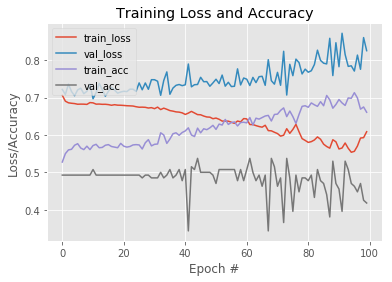

In [34]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 3s 2ms/step - loss: 0.7137 - acc: 0.5349 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 2/100
1202/1202 [==============================] - 0s 257us/step - loss: 0.6843 - 

Epoch 54/100
1202/1202 [==============================] - 0s 223us/step - loss: 0.6452 - acc: 0.6314 - val_loss: 0.8099 - val_acc: 0.4478
Epoch 55/100
1202/1202 [==============================] - 0s 211us/step - loss: 0.6481 - acc: 0.6198 - val_loss: 0.7591 - val_acc: 0.4403
Epoch 56/100
1202/1202 [==============================] - 0s 260us/step - loss: 0.6597 - acc: 0.6082 - val_loss: 0.7787 - val_acc: 0.4478
Epoch 57/100
1202/1202 [==============================] - 0s 256us/step - loss: 0.6464 - acc: 0.6323 - val_loss: 0.7448 - val_acc: 0.5075
Epoch 58/100
1202/1202 [==============================] - 0s 227us/step - loss: 0.6402 - acc: 0.6306 - val_loss: 0.7619 - val_acc: 0.4925
Epoch 59/100
1202/1202 [==============================] - 0s 220us/step - loss: 0.6455 - acc: 0.6198 - val_loss: 0.7678 - val_acc: 0.5000
Epoch 60/100
1202/1202 [==============================] - 0s 262us/step - loss: 0.6396 - acc: 0.6398 - val_loss: 0.7846 - val_acc: 0.4776
Epoch 61/100
1202/1202 [==========

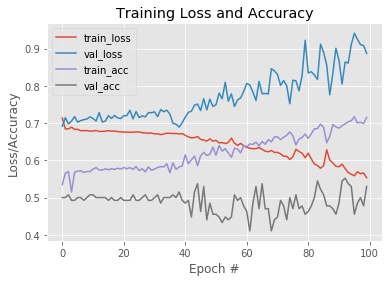

In [35]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 2s 1ms/step - loss: 0.8223 - acc: 0.5466 - val_loss: 0.7263 - val_acc: 0.4179
Epoch 2/100
1202/1202 [==============================] - 0s 145us/step - loss: 0.6994 - 

Epoch 54/100
1202/1202 [==============================] - 0s 129us/step - loss: 0.6586 - acc: 0.5965 - val_loss: 0.7004 - val_acc: 0.5224
Epoch 55/100
1202/1202 [==============================] - 0s 121us/step - loss: 0.6545 - acc: 0.6140 - val_loss: 0.7039 - val_acc: 0.5075
Epoch 56/100
1202/1202 [==============================] - 0s 123us/step - loss: 0.6537 - acc: 0.6156 - val_loss: 0.7139 - val_acc: 0.5000
Epoch 57/100
1202/1202 [==============================] - 0s 117us/step - loss: 0.6532 - acc: 0.6023 - val_loss: 0.7161 - val_acc: 0.5000
Epoch 58/100
1202/1202 [==============================] - 0s 130us/step - loss: 0.6546 - acc: 0.5998 - val_loss: 0.7142 - val_acc: 0.5149
Epoch 59/100
1202/1202 [==============================] - 0s 131us/step - loss: 0.6529 - acc: 0.6090 - val_loss: 0.7087 - val_acc: 0.5149
Epoch 60/100
1202/1202 [==============================] - 0s 125us/step - loss: 0.6527 - acc: 0.6065 - val_loss: 0.7093 - val_acc: 0.5075
Epoch 61/100
1202/1202 [==========

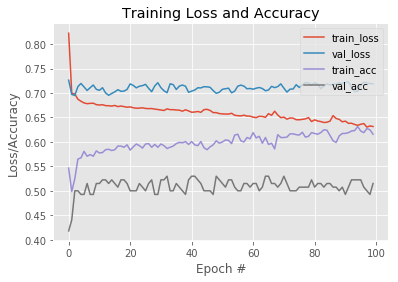

In [36]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)